In [298]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [299]:
data = pd.read_csv('ds_salaries.csv')

le = preprocessing.LabelEncoder()
data['experience_level'] = le.fit_transform(data['experience_level'])
data['employment_type'] = le.fit_transform(data['employment_type'])
data['salary_currency'] = le.fit_transform(data['salary_currency'])
data['job_title'] = le.fit_transform(data['job_title'])
data['employee_residence'] = le.fit_transform(data['employee_residence'])
data['company_location'] = le.fit_transform(data['company_location'])
data['company_size'] = le.fit_transform(data['company_size'])

data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


In [300]:
x = data[['work_year', 'experience_level', 'employment_type', 'company_size', 'employee_residence', 'company_location']]
y = data['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)


In [301]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(
    hidden_layer_sizes=(30, 10),
    random_state=5,
    learning_rate_init=0.01,
    max_iter=1000,
)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

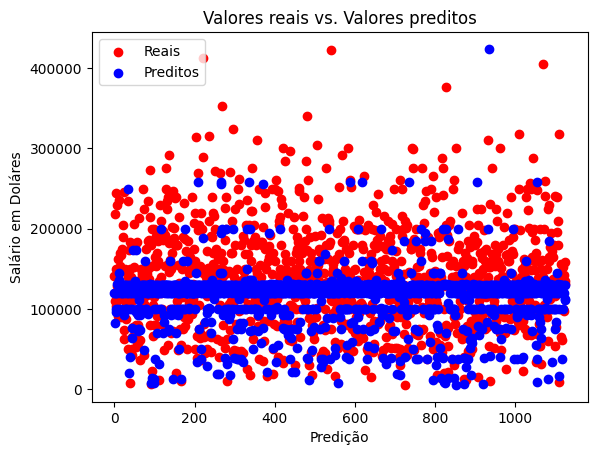

Acurracy Score: 0.02839396628216504
R2 Score: -0.04419129280362699


In [302]:
plt.scatter(range(len(y_test)), y_test, color='red', label='Reais')
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Preditos')
plt.xlabel('Predição')
plt.ylabel('Salário em Doláres')
plt.title('Valores reais vs. Valores preditos')
plt.legend()
plt.show()

print("Acurracy Score:", accuracy_score(y_test,y_pred))
print("R2 Score:", r2_score(y_test, y_pred))